In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import pynance as pn
import matplotlib.pyplot as plt
from pyti import simple_moving_average as sma
from sklearn.preprocessing import LabelEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Add the scripts folder to the system path so we can import time_series.py
import sys
import os

# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))     # For path.py
# import scripts 
from EDA import EDA
from insight import Insight
from csv_loader import CSVLoader
from time_series import TimeSeries
from preprocessing import Preprocessing
import path

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Loading stock price time series data for seven companies then merging them in one dataframe 

In [2]:
folder_path = path.get_path_price()

# Create an instance of CSVLoader
csv_loader = CSVLoader(folder_path)

# Load CSV files
csv_loader.load_csv_files()

# Merge the loaded dataframes
merged_df = csv_loader.merge_dataframes()

# Display the first few rows
merged_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


### Loading stock market news dataset for different companies 

In [ ]:
news = path.get_path_news()
df = path.load_news_csv(news)
df.head()

In [14]:
# Step 2: Perform EDA for stock price
eda_stock_price = EDA(merged_df)
# Step 2: Perform EDA for stock price
eda_stock_news = EDA(df)

In [15]:
# Display basic info for stock price
eda_stock_price.display_basic_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   company       45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ MB
None

Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
company         0
dtype: int64

Dataset Shape: (45428, 10)


In [16]:
# Display basic info for stock news
eda_stock_news.display_basic_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

Missing Values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

Dataset Shape: (1407328, 6)


This dataset contains <span style="color:pink">*1,407,328 rows*</span> and <span style="color:pink">*6 columns*</span> with no missing values in any column. Here’s a quick analysis of its structure:

### 1. Columns and Data Types:

* <span style="color:orange">***Unnamed: 0:***</span> Integer index column, <span style="color:red">that uniquely identified the rows </span> likely unnecessary and can be dropped.<br>
* <span style="color:orange">***headline:***</span>  Text data (object), likely representing news headlines. <span style="color:teal">*Sentement texts*</span><br>
* <span style="color:orange">***url:***</span>  Text data (object), contains links to the news articles.<br>
* <span style="color:orange">***publisher:***</span>  Text data (object), represents the source or publisher of the news.<br>
* <span style="color:orange">***date:***</span>  Text data (object), represents the date of the news, which can be converted to datetime for analysis.
* <span style="color:orange">***stock:***</span>  Text data (object), seems to represent stock identifiers or related information.
### 2. Data Characteristics:

* All columns are complete (non-null)<br>
* Most columns are text-heavy (headline, url, publisher, stock) and may require preprocessing for further analysis, especially if this is used in NLP or stock market prediction tasks.<br>
* The date column can be valuable for time-series analysis or trend studies.<br>
### 3. What I planned to do in Next Steps as per the above two results are:

* ***Clean the data***: Drop <span style="color:brown">Unnamed: 0</span> if redundant.
* ***Preprocess the text***: Tokenize or clean <span style="color:brown">headline</span> and <span style="color:brown">publisher</span> for NLP tasks.
* ***Convert <span style="color:brown">date</span> to datetime***: For temporal analysis.
* ***Investigate <span style="color:brown">stock</span>***: Understand its role—does it correspond to stock tickers or categories?

# Preprocessing 

First and for most on preprocessing phase is checking missing values. The below code shows me there is no missing value as well the above information too. 

In [17]:
df[df.isnull().any(axis=1) ]

,Unnamed: 0,headline,url,publisher,date,stock


The  next step that I observed there is a duplicated unneccessary index column, that need to be droped. as shown the below code

In [18]:
# Drop unneccessary duplicated index value as a column lable and 
# the url columns is just address that the data extracted, this data is irrilevant for analysis, drop it  
df = df.drop(columns=["Unnamed: 0", "url"])

Then ***Date*** columns is stored as ***Object*** datatype while it need to be converted/transformed to ***DateTime***

In [19]:
# Transform date to datetime (Parse) and sort dates
eda_stock_news.parse_dates()

In [20]:
# Calculate sentiment scores
eda_stock_news.sentiment_score()

                                                  headline  sentiment
879310                        How Treasuries and ETFs Work     0.2263
519806       Update on the Luxury Sector: 2nd Quarter 2009     0.0000
1390006      Update on the Luxury Sector: 2nd Quarter 2009     0.0000
1432                                Going Against the Herd     0.0000
67712    Charles Sizemore Radio Interview Saturday Morning     0.0000


In [21]:
# Step 3: Preprocess data
preprocessor = Preprocessing(eda_stock_news.dataframe)

### Obtain basic statistics for textual lengths (like headline length).

In [ ]:
# Obtain headline length statistics
preprocessor.headline_length_statistics()

### Count the number of articles per publisher to identify which publishers are most active.

In [ ]:
# Count articles per publisher and visualize
preprocessor.count_articles_per_publisher()

### Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [ ]:
# Analyze publication dates and visualize trends
preprocessor.analyze_publication_dates()

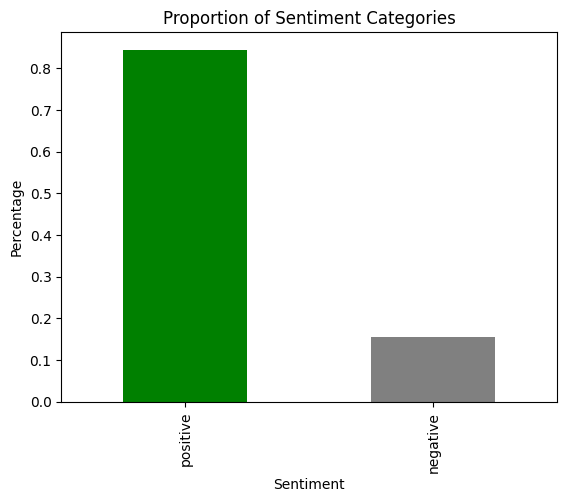

In [22]:
# Determine sentiment categories and visualize
preprocessor.determine_sentiment_category()

# Text Analysis(Sentiment analysis & Topic Modeling):
* Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
* Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

In [ ]:
# Initialize the Insight class with your dataframe
insight = Insight(df)

# Perform sentiment analysis and visualize the results
insight.sentiment_analysis()

# Perform topic modeling and visualize the extracted topics
insight.topic_modeling(num_topics=5, num_words=10)

# Plot sentiment vs. topic distribution
insight.plot_sentiment_vs_topic_distribution()

# Time Series Analysis:
* How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
* Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

In [ ]:
# Initialize the TimeSeries class with your dataframe
time_series = TimeSeries(df)

# Analyze publication frequency over time with daily frequency
time_series.analyze_publication_frequency(time_unit='D')

# Analyze publishing times (hour, day of week, and month)
time_series.analyze_publishing_times()


# Publisher Analysis:
* Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
* If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

# Analyze publishers contributing to the news feed
time_series.analyze_publishers()

In [ ]:
# # Categorize and visualize sentiment
# eda_stock_news.setement_category()

In [ ]:
# Plot sentiment distribution
eda_stock_news.plot_sentiment_distribution()

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_1\EDA.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.dataframe, x='headline', palette='viridis')


In [ ]:
# Visualize word counts
eda_stock_news.visualize_word_counts()

In [ ]:
# Plot correlation heatmap
eda_stock_news.correlation_heatmap()

Here the result shows me 55987 records are null values. Therefore, I need to drop those null values becuase there is no way to replace the date dataset 

In [15]:
#Drop invalid datetime value after coversion 
df = df[df['date'].notna()]

In [58]:
# Step 4: Clean the 'headline' column
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['headline'] = df['headline'].apply(clean_text)

In [59]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for the headlines
def calculate_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Use the compound score

df['sentiment'] = df['headline'].apply(calculate_sentiment)

df[['headline', 'sentiment']].head()

,headline,sentiment
879310,how treasuries and etfs work,0.2263
519806,update on the luxury sector 2nd quarter 2009,0.0000
1390006,update on the luxury sector 2nd quarter 2009,0.0000
1432,going against the herd,0.0000
67712,charles sizemore radio interview saturday morning,0.0000


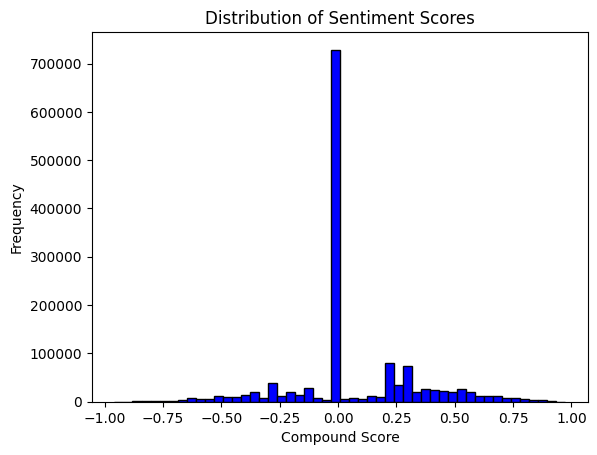

In [60]:
# Plot the distribution of compound scores
plt.hist(df['sentiment'], bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9616\199743984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(


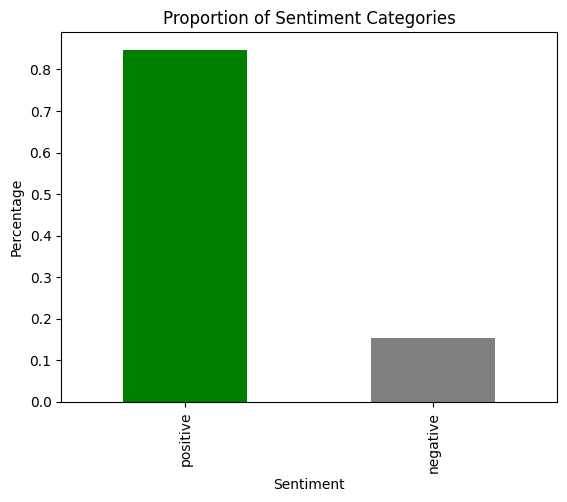

In [101]:
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'positive' if x > -0.1 else 'negative' if x < -0.1 else 'neutral'
)

sentiment_counts = df['sentiment_category'].value_counts(normalize=True)
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title("Proportion of Sentiment Categories")
plt.ylabel("Percentage")
plt.xlabel("Sentiment")
plt.show()


In [85]:
# df['stock_change'] = df['stock'].diff()

# plt.scatter(df['sentiment'], df['stock_change'], alpha=0.5)
# plt.title("Sentiment vs. Stock Change")
# plt.xlabel("Compound Sentiment Score")
# plt.ylabel("Stock Change")
# plt.axhline(0, color='red', linestyle='dashed')
# plt.show()


<Axes: xlabel='sentiment_category', ylabel='sentiment'>

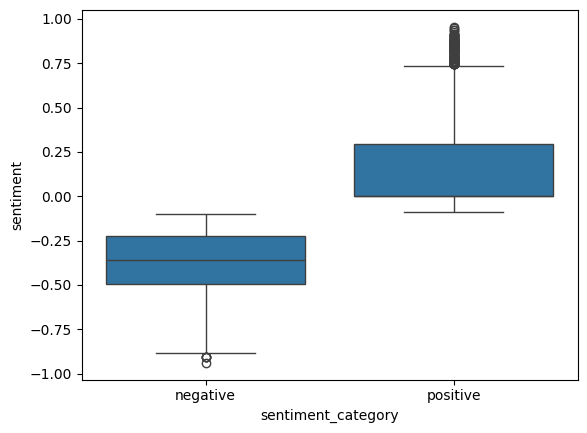

In [102]:
sns.boxplot(x='sentiment_category', y='sentiment', data=df)


In [100]:
df.tail(10)

,headline,publisher,date,stock,sentiment,sentiment_category
6680,tech stocks and faangs strong again to start d...,JJ Kinahan,2020-06-10 15:33:26+00:00,AAPL,0.5574,positive
76178,tech stocks and faangs strong again to start d...,JJ Kinahan,2020-06-10 15:33:26+00:00,AMZN,0.5574,positive
924272,afternoon market stats in 5 minutes,Benzinga Insights,2020-06-10 16:12:25+00:00,NVDA,0.0000,neutral
924271,shares of several technology companies are tra...,Benzinga Newsdesk,2020-06-10 16:37:10+00:00,NVDA,0.7296,positive
1255223,tesla hacker unlocks performance upgrade and a...,Benzinga Newsdesk,2020-06-10 16:41:58+00:00,TSLA,0.4019,positive
565381,how cannabis company cannaphyll is marketing o...,Jaycee Tenn,2020-06-10 17:18:50+00:00,GOOG,0.1779,positive
76177,how cannabis company cannaphyll is marketing o...,Jaycee Tenn,2020-06-10 17:18:50+00:00,AMZN,0.1779,positive
1255222,tesla factory workplace safety is 5 better tha...,Benzinga Newsdesk,2020-06-10 19:08:09+00:00,TSLA,0.8176,positive
565380,facebook snap analyst projects q2 revenue upsi...,Shanthi Rexaline,2020-06-10 19:25:13+00:00,GOOG,0.0000,neutral
1255221,teslas stock closes at alltime high as musk pu...,Drew Levine,2020-06-10 21:02:47+00:00,TSLA,0.5574,positive


In [104]:
df.to_csv('../Week1_data/sentiment_headlines.csv', index=False)
my_sentiment = pd.read_csv('../Week1_data/sentiment_headlines.csv')
my_sentiment.head()


,headline,publisher,date,stock,sentiment,sentiment_category
0,nvidia goes negative nvda,Scott Rubin,2011-03-03 00:00:00+00:00,NVDA,-0.5719,negative
1,auriga still not sure where reality lies for n...,BenzingaStaffB,2011-03-07 00:00:00+00:00,NVDA,-0.5806,negative
2,goldman sachs gives color on semiconductors nv...,Benzinga Staff,2011-03-07 00:00:00+00:00,NVDA,0.0000,positive
3,jp morgan upgrades nvidia corporation to neutr...,Mark Page,2011-03-08 00:00:00+00:00,NVDA,0.2023,positive
4,jp morgan upgrades nvidia to neutral 21 pt,Joe Young,2011-03-08 00:00:00+00:00,NVDA,0.2023,positive


C:\Users\Admin\AppData\Local\Temp\ipykernel_9616\3461558374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


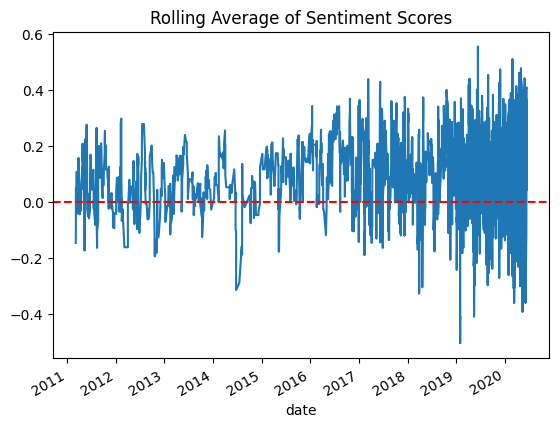

In [105]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df['rolling_sentiment'] = df['sentiment'].rolling(window=7).mean()

df['rolling_sentiment'].plot(title="Rolling Average of Sentiment Scores")
plt.axhline(0, color='red', linestyle='dashed')
plt.show()


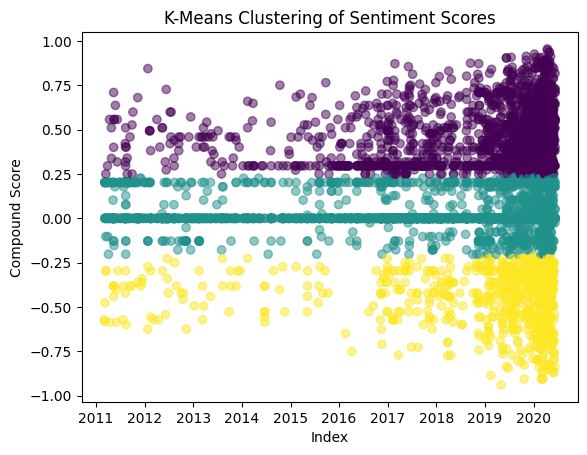

In [106]:
from sklearn.cluster import KMeans

scores = df['sentiment'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scores)
df['sentiment_cluster'] = kmeans.labels_

# Visualize clusters
plt.scatter(df.index, df['sentiment'], c=df['sentiment_cluster'], cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering of Sentiment Scores")
plt.xlabel("Index")
plt.ylabel("Compound Score")
plt.show()


In [70]:
thresholds = [-0.2, -0.1, 0.0, 0.1, 0.2]
for threshold in thresholds:
    df['sentiment_category'] = df['sentiment'].apply(
        lambda x: 'positive' if x > threshold else 'negative' if x < -threshold else 'neutral'
    )
    print(f"Threshold: {threshold}")
    print(df['sentiment_category'].value_counts(normalize=True))


Threshold: -0.2
sentiment_category
positive    0.876731
negative    0.123269
Name: proportion, dtype: float64
Threshold: -0.1
sentiment_category
positive    0.842659
negative    0.157341
Name: proportion, dtype: float64
Threshold: 0.0
sentiment_category
neutral     0.515831
positive    0.320553
negative    0.163616
Name: proportion, dtype: float64
Threshold: 0.1
sentiment_category
neutral     0.531219
positive    0.311441
negative    0.157341
Name: proportion, dtype: float64
Threshold: 0.2
sentiment_category
neutral     0.584278
positive    0.292453
negative    0.123269
Name: proportion, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9616\1658713762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_9616\1658713762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_9616\1658713762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

<Axes: xlabel='Threshold', ylabel='value'>

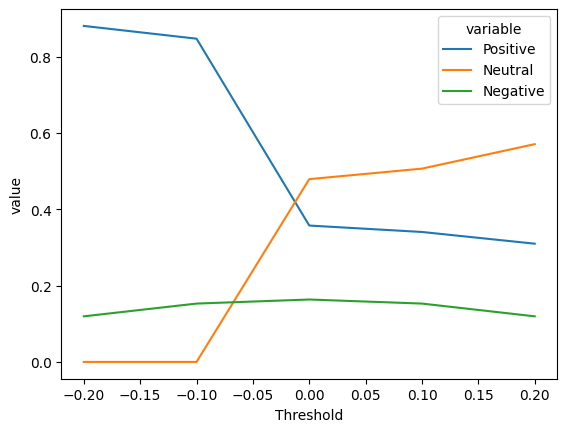

In [79]:
thresholds = [-0.2, -0.1, 0.0, 0.1, 0.2]
proportions = {
    'Threshold': [],
    'Positive': [],
    'Neutral': [],
    'Negative': []
}

for threshold in thresholds:
    df['sentiment_category'] = df['sentiment'].apply(
        lambda x: 'positive' if x > threshold else 'negative' if x < -threshold else 'neutral'
    )
    sentiment_counts = df['sentiment_category'].value_counts(normalize=True)
    proportions['Threshold'].append(threshold)
    proportions['Positive'].append(sentiment_counts.get('positive', 0))
    proportions['Neutral'].append(sentiment_counts.get('neutral', 0))
    proportions['Negative'].append(sentiment_counts.get('negative', 0))

sns.lineplot(x='Threshold', y='value', hue='variable',
             data=pd.melt(pd.DataFrame(proportions), id_vars=['Threshold']))


In [117]:
# Step 5: Encode categorical variables
label_encoder = LabelEncoder()
df['publisher_encoded'] = label_encoder.fit_transform(df['publisher'])
df['stock_encoded'] = label_encoder.fit_transform(df['stock'])

In [119]:
# Step 6: Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [18]:
df.head()

,headline,publisher,date,stock
879310,how treasuries and etfs work,Paco Ahlgren,2009-02-14 00:00:00+00:00,NAV
519806,update on the luxury sector 2nd quarter 2009,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,FT
1390006,update on the luxury sector 2nd quarter 2009,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,Y
1432,going against the herd,Charles Lewis Sizemore CFA,2009-04-29 00:00:00+00:00,A
67712,charles sizemore radio interview saturday morning,Charles Lewis Sizemore CFA,2009-05-22 00:00:00+00:00,AM


In [19]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for the headlines
def calculate_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Use the compound score

df['sentiment'] = df['headline'].apply(calculate_sentiment)

df[['headline', 'sentiment']].head()

,headline,sentiment
879310,how treasuries and etfs work,0.2263
519806,update on the luxury sector 2nd quarter 2009,0.0000
1390006,update on the luxury sector 2nd quarter 2009,0.0000
1432,going against the herd,0.0000
67712,charles sizemore radio interview saturday morning,0.0000


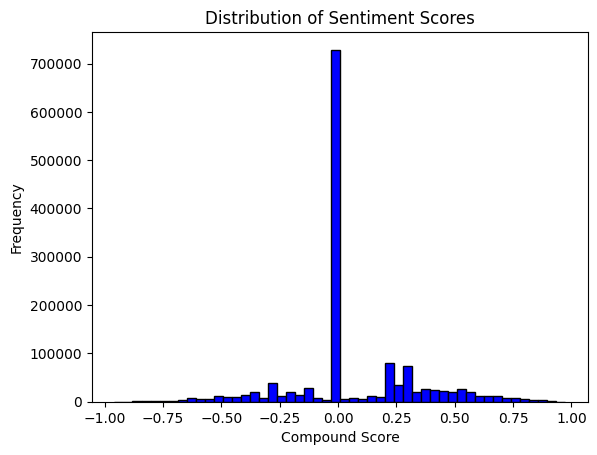

In [22]:
# Plot the distribution of compound scores
plt.hist(df['sentiment'], bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df['stock_change'] = df['sentiment'].diff()  # Calculate stock change

def classify_sentiment_with_stock(row):
    if row['stock_change'] > 0.1:
        return 'positive'
    elif row['stock_change'] < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['expected_sentiment'] = df.apply(classify_sentiment_with_stock, axis=1)
# Compare expected_sentiment with your model's sentiment and refine thresholds


In [29]:
df['predicted_sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score

thresholds = [-0.1, -0.05, 0.0, 0.05, 0.1]
best_threshold = None
best_accuracy = 0

for threshold in thresholds:
    def classify_sentiment(text):
        score = analyzer.polarity_scores(text)['compound']
        if score >= threshold:
            return 'positive'
        elif score <= -threshold:
            return 'negative'
        else:
            return 'neutral'

    df['predicted_sentiment'] = df['headline'].apply(classify_sentiment)
#     accuracy = accuracy_score(df['true_sentiment'], df['predicted_sentiment'])
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_threshold = threshold

# print(f"Best threshold: {best_threshold}, Best accuracy: {best_accuracy}")


In [32]:
df['predicted_sentiment'].value_counts()

predicted_sentiment
neutral     747599
positive    438299
negative    221430
Name: count, dtype: int64

I use the stack sentiment that I have a dataset like META, NVDA, AAPL, AMZN, GOOGL, MSFT, and TSLA

In [71]:
df = df[(df['stock'] == "NVDA") | (df['stock'] == "AAPL") | (df['stock'] == "AMZN") | (df['stock'] == "GOOG")| (df['stock'] == "META") | (df['stock'] == "MSFT")| (df['stock'] == "TSLA")]

In [73]:
df['stock'].unique()

array(['NVDA', 'GOOG', 'TSLA', 'AAPL', 'AMZN'], dtype=object)

In [ ]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment category
def calculate_sentiment_category(text):
    sentiment = analyzer.polarity_scores(text)['compound']  # Use the compound score
    if sentiment >= 0:
        return 'positive'
    elif sentiment <= 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to classify each headline
df['sentiment'] = df['headline'].apply(calculate_sentiment_category)

# View results
print(df[['headline', 'sentiment']].head())


In [129]:
# Keep relevant columns for quantitative analysis
quant_df = df[['date', 'stock', 'sentiment']].copy()
quant_df.tail()

,date,stock,sentiment
1039004,2020-06-11 20:49:41+00:00,PVH,0.0000
1357564,2020-06-11 20:51:33+00:00,WMT,0.2732
1269090,2020-06-11 21:01:39+00:00,TWTR,-0.2500
980443,2020-06-11 21:11:20+00:00,PCG,0.4215
1343658,2020-06-11 21:12:35+00:00,WFC,0.0000


In [ ]:
# Simulate dummy stock prices for demonstration
np.random.seed(42)
unique_stocks = quant_df['stock'].unique()
price_data = {stock: np.random.uniform(50, 500, len(quant_df[quant_df['stock'] == stock])) for stock in unique_stocks}

# Add dummy prices to the dataframe
quant_df['price'] = quant_df.apply(lambda row: price_data[row['stock']].pop(0), axis=1)
print(quant_df.head())

In [9]:
from pyti import simple_moving_average as sma
# sma_values = sma.simple_moving_average(close_prices, period=20)

In [ ]:
# Group by stock for individual analysis
stock_groups = quant_df.groupby('stock')

# Calculate indicators for each stock
indicators = []

for stock, data in stock_groups:
    data = data.sort_values('date')
    close_prices = data['price'].values

    # Example: Add moving averages and RSI
    data['SMA_10'] = talib.SMA(close_prices, timeperiod=10)
    data['SMA_20'] = talib.SMA(close_prices, timeperiod=20)
    data['RSI'] = talib.RSI(close_prices, timeperiod=14)

    indicators.append(data)

# Combine data back
quant_analysis_df = pd.concat(indicators)
print(quant_analysis_df.head())

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Tokenize text data
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['headline'])

# Convert headlines to sequences
sequences = tokenizer.texts_to_sequences(df['headline'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Step 2: Prepare input and output data
X = padded_sequences
y = df['sentiment'].values

# Convert sentiment scores to binary labels (positive/negative sentiment)
y = np.where(y >= 0, 1, 0)  # Positive: 1, Negative: 0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and test data prepared.")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define LSTM model
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


In [ ]:

# Simulate dummy stock prices for demonstration
np.random.seed(42)
unique_stocks = quant_df['stock'].unique()
price_data = {stock: np.random.uniform(50, 500, len(quant_df[quant_df['stock'] == stock])) for stock in unique_stocks}

# Add dummy prices to the dataframe
quant_df['price'] = quant_df.apply(lambda row: price_data[row['stock']].pop(0), axis=1)
print(quant_df.head())

In [8]:
# Transform headline or sentiment to lower case, remove numbers and special character
df.loc[:,'headline'] = df['headline'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


I also believe that ***url*** is not important for analysis, So I decieded to drop the ***url*** as a column label

In [9]:
df = df.drop(columns=["url"])

In [26]:
df.head()

,headline,publisher,date,stock
0,stocks that hit week highs on friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,stocks that hit week highs on wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,biggest movers from friday,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,stocks moving in fridays midday session,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,b of a securities maintains neutral on agilent...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [10]:
# To check the unique values of 'publisher' column I can use either
df["publisher"].nunique()
# or
df['publisher'].value_counts()

publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64

Here we have <span style = 'color:orange'>***255***</span> unique values

In [33]:
df.shape

(55987, 4)

I have an options to use <span style = "color:teal">***one-hot-encoding***</span> for encoding but, in my case, since there are 
255 unique publishers among thetotal of 55987,this might lead to high dimensionality (many columns), which can be inefficient and hard to manage in machine learning models. Therefore, using <span style = "color:teal">***one-hot-encoding***</span> is inefficient

Therefore, <span style = "color:teal">***Label Encoding***</span> recommended for large number of categories as like the data I have

In [11]:
# Initialize the label encoder
encoder = LabelEncoder()

# Apply label encoding to the 'publisher' column
df['publisher'] = encoder.fit_transform(df['publisher'])

In [12]:
df.head()

,headline,publisher,date,stock
0,stocks that hit week highs on friday,18,2020-06-05 10:30:54-04:00,A
1,stocks that hit week highs on wednesday,18,2020-06-03 10:45:20-04:00,A
2,biggest movers from friday,122,2020-05-26 04:30:07-04:00,A
3,stocks moving in fridays midday session,122,2020-05-22 12:45:06-04:00,A
4,b of a securities maintains neutral on agilent...,214,2020-05-22 11:38:59-04:00,A


In [13]:

df['stock'].value_counts()

stock
ZX       10
A        10
AA       10
AAC      10
ZUMZ     10
         ..
ATMP      1
ACCU      1
ZMLP      1
ZIONW     1
SMLL      1
Name: count, Length: 6204, dtype: int64

In [14]:
df['stock'] = encoder.fit_transform(df['stock'])

In [22]:
df.head()

,headline,publisher,date,stock,publisher_encoded,stock_encoded
0,stocks that hit week highs on friday,18,2020-06-05 10:30:54-04:00,0,18,0
1,stocks that hit week highs on wednesday,18,2020-06-03 10:45:20-04:00,0,18,0
2,biggest movers from friday,122,2020-05-26 04:30:07-04:00,0,122,0
3,stocks moving in fridays midday session,122,2020-05-22 12:45:06-04:00,0,122,0
4,b of a securities maintains neutral on agilent...,214,2020-05-22 11:38:59-04:00,0,214,0


In [16]:
df['publisher_encoded'] = df['publisher'].astype('category').cat.codes


In [18]:
df['stock_encoded'] = df['stock'].astype('category').cat.codes


In [20]:
df['publisher'] = df['publisher'].astype('category')
df['stock'] = df['stock'].astype('category')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['publisher'] = df['publisher'].astype('category')

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
df['headline_length'] = df['headline'].str.len()

In [ ]:
print(df.info())
print(df.isnull().sum())